<a href="https://colab.research.google.com/github/SundarML/Machine-Learning/blob/master/LinearRegressionGoogle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression - Gradient Descent Method - 14/Apr/2020


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [0]:
from sklearn import datasets
x, y = datasets.load_boston(return_X_y=True)
X = x[:,2:3].reshape(506,)

In [0]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate), loss='mean_squared_error', 
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model
def train_model(model, feature, label, epochs, batch_size):
  history = model.fit(x=feature, y=label, batch_size=None, epochs=epochs)
  training_weights = model.get_weights()[0]
  training_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist['root_mean_squared_error']
  

  return training_weights, training_bias, epochs, rmse, hist
print('Defined creat_model train_model')     

Defined creat_model train_model


In [0]:
def plot_model(my_feature, training_bias, training_weights, my_label):
  x0 = 0
  x1 = my_feature[-1]
  y0 = training_bias
  y1 = training_bias + (x1*training_weights)
  plt.scatter(my_feature, my_label)
  plt.plot([x0,x1], [y0,y1], c='r')
def plot_loss_curve(epochs, rmse):
  plt.figure()
  plt.plot(epochs, rmse, c='orange')
  plt.xlabel('Epochs')
  plt.ylabel('RMSE')
  plt.ylim(rmse.min()*0.95, rmse.max())

In [0]:
my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [0]:
my_feature[-1]

12.0

Epoch 1/70
1/1 [==============================] - 0s 2ms/step - loss: 1274.2144 - root_mean_squared_error: 35.6961
Epoch 2/70
1/1 [==============================] - 0s 1ms/step - loss: 1026.8134 - root_mean_squared_error: 32.0439
Epoch 3/70
1/1 [==============================] - 0s 886us/step - loss: 872.2797 - root_mean_squared_error: 29.5344
Epoch 4/70
1/1 [==============================] - 0s 2ms/step - loss: 756.6492 - root_mean_squared_error: 27.5073
Epoch 5/70
1/1 [==============================] - 0s 2ms/step - loss: 663.5981 - root_mean_squared_error: 25.7604
Epoch 6/70
1/1 [==============================] - 0s 2ms/step - loss: 585.7225 - root_mean_squared_error: 24.2017
Epoch 7/70
1/1 [==============================] - 0s 2ms/step - loss: 518.9532 - root_mean_squared_error: 22.7805
Epoch 8/70
1/1 [==============================] - 0s 2ms/step - loss: 460.7801 - root_mean_squared_error: 21.4658
Epoch 9/70
1/1 [==============================] - 0s 1ms/step - loss: 409.5297 - roo

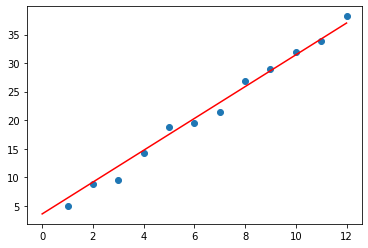

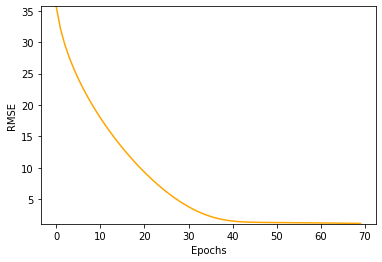

In [0]:
learning_rate = 0.14
epochs = 70
my_batch_size=1

my_model = build_model(learning_rate)
training_weights, training_bias, epochs, rmse, df_hist = train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_model(my_feature, training_bias, training_weights, my_label)
plot_loss_curve(epochs, rmse)

In [0]:
training_bias
training_bias+training_weights*my_feature

array([[ 6.3764441 ,  9.16130567, 11.94616723, 14.7310288 , 17.51589036,
        20.30075192, 23.08561349, 25.87047505, 28.65533662, 31.44019818,
        34.22505975, 37.00992131]])

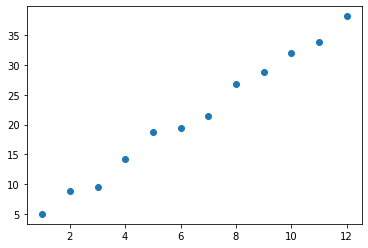

In [0]:
plt.scatter(my_feature, my_label)

Real world problem - California Housing Data

In [2]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
training_df['median_house_value']/=1000
training_df.head(2)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1


In [4]:
df = training_df[['housing_median_age','median_income','population','median_house_value','total_rooms','total_bedrooms']]
df.describe()


,housing_median_age,median_income,population,median_house_value,total_rooms,total_bedrooms
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,28.589353,3.883578,1429.573941,207.300912,2643.664412,539.410824
std,12.586937,1.908157,1147.852959,115.983764,2179.947071,421.499452
min,1.000000,0.499900,3.000000,14.999000,2.000000,1.000000
25%,18.000000,2.566375,790.000000,119.400000,1462.000000,297.000000
50%,29.000000,3.544600,1167.000000,180.400000,2127.000000,434.000000
75%,37.000000,4.767000,1721.000000,265.000000,3151.250000,648.250000
max,52.000000,15.000100,35682.000000,500.001000,37937.000000,6445.000000


(array([0.00675894, 0.01078431, 0.02121107, 0.0256286 , 0.02373702,
        0.02236448, 0.0339677 , 0.01773933, 0.01523645, 0.01865052]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <a list of 10 Patch objects>)

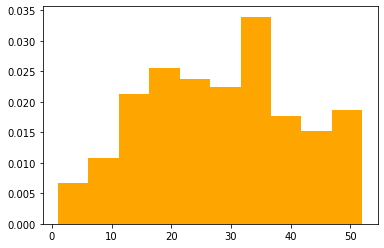

In [5]:
plt.hist(training_df['housing_median_age'], density=True, color='orange' )

In [0]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate), loss='mean_squared_error', 
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model
def train_model(model, df, feature, label, epochs, batch_size):
  history = model.fit(x=df[feature], y=df[label], batch_size=None, epochs=epochs)
  training_weights = model.get_weights()[0]
  training_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist['root_mean_squared_error']
  

  return training_weights, training_bias, epochs, rmse, hist
print('Defined creat_model train_model') 



Defined creat_model train_model


In [0]:
def plot_the_model(df, feature, label, training_weights, training_bias):
  random_example = df.sample(n=200)
  plt.scatter(random_example[feature], random_example[label], color='red')
  x0 = 0
  y0 = training_bias
  x1 = 10000
  y1 = training_bias+training_weights*x1
  plt.plot([x0,x1], [y0,y1], color='blue')
def plot_loss_function(epochs, rmse):
  plt.plot(epochs, rmse) 
  plt.ylim(rmse.min(), rmse.max()*0.2) 

In [0]:
learning_rate = 0.01
epochs = 30
my_batch_size=30

my_feature = 'total_rooms'
my_label = 'median_house_value'

my_model = None
my_model = build_model(learning_rate)
weight,bias,epochs,rmse,hist =train_model(my_model, training_df, my_feature, my_label, epochs, my_batch_size)
print('\n The learned weight of the model %.4f'%weight)
print('\n The learned bias of the model %.4f'%bias)

Epoch 1/30
532/532 [==============================] - 1s 966us/step - loss: 2317431.5000 - root_mean_squared_error: 1523.3605
Epoch 2/30
532/532 [==============================] - 0s 938us/step - loss: 28411.2383 - root_mean_squared_error: 168.4261
Epoch 3/30
532/532 [==============================] - 0s 883us/step - loss: 27427.5430 - root_mean_squared_error: 165.6869
Epoch 4/30
532/532 [==============================] - 0s 905us/step - loss: 26816.0879 - root_mean_squared_error: 163.8127
Epoch 5/30
532/532 [==============================] - 0s 895us/step - loss: 25931.1426 - root_mean_squared_error: 161.0927
Epoch 6/30
532/532 [==============================] - 1s 962us/step - loss: 25649.0547 - root_mean_squared_error: 160.2258
Epoch 7/30
532/532 [==============================] - 0s 936us/step - loss: 24928.9043 - root_mean_squared_error: 157.8846
Epoch 8/30
532/532 [==============================] - 0s 911us/step - loss: 24101.6055 - root_mean_squared_error: 155.2980
Epoch 9/30
53

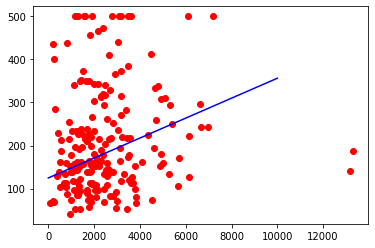

In [0]:
plot_the_model(training_df, 'total_rooms','median_house_value', weight, bias)

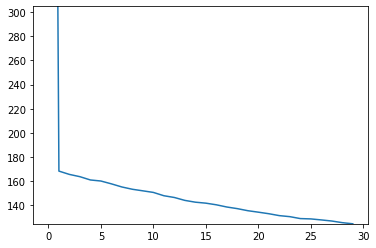

In [0]:
plot_loss_function(epochs, rmse)

In [0]:
#x = training_df['total_rooms'][1]
#batch = training_df['total_rooms'][10000:10008]
#batch.index.to_list()
print(5612)
my_model.predict([x])


5612


array([[301.80417]], dtype=float32)

In [0]:
def predict_house_values(n,feature,label):
  batch = training_df[feature][10000:10000+n]
  predicted_values = my_model.predict_on_batch(x=batch)
  indx = (batch.index).to_list()
  print('feature      label        predicted')
  print('---------------------------------------------')
  for i,j in zip(indx,range(n)):
    print('%5.0f %9.0f %15.0f'%(training_df[feature][i],training_df[label][i],predicted_values[j]))

In [0]:
predict_house_values(10,'total_rooms','median_house_value')

feature      label        predicted
---------------------------------------------
 1960        53             170
 3400        92             203
 3677        69             210
 2202        62             176
 2403        80             180
 5652       295             256
 3318       500             202
 2552       342             184
 1364       118             156
 3468       128             205


Correlation :

0 10
1 11
2 12
3 13
